In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
import pprint
# from statesjson import us_states_json
# from states import us_states
from citipy import citipy
import warnings
import matplotlib.pyplot as plt

In [2]:
cloud_cover = pd.read_csv("Cloud_Cover_Data_Final.csv")
ozone_data = pd.read_csv("ozone_data.csv")

In [3]:
cloud_cover_clean = cloud_cover.transpose()
cloud_cover_clean.columns = cloud_cover_clean.iloc[0]
cloud_cover_cleaner = cloud_cover_clean
cloud_cover_cleanest = cloud_cover_clean.drop("Year").rename(columns = {2015.0: "2015", 2016.0: "2016", 2017.0: "2017",\
                                                                        2018.0: "2018", 2019.0: "2019"})
cloud_cover_cleanest

Year,2015,2016,2017,2018,2019
Acadia National Park,44.377808,41.175683,43.106575,29.928767,4.335890
Arches National Park,21.405234,20.659016,16.102740,16.010440,17.761918
Big Bend National Park,3.235890,2.628962,1.942192,2.641096,4.364658
Biscayne National Park,25.233014,34.624317,33.796712,34.451233,34.643014
Black Canyon of the Gunnison National Park,27.725205,25.918579,21.785479,22.637260,23.481918
Canyonlands National Park,21.405234,20.659016,16.102740,16.010440,17.761918
Carlsbad Caverns National Park,20.647260,16.522678,15.138219,17.149315,14.798904
Channel Islands National Park,12.661370,14.724590,15.423014,13.896712,18.207397
Congaree National Park,39.947123,34.269399,34.056438,38.621370,33.117534
Cuyahoga Valley National Park,56.375890,51.620765,58.283836,38.485479,30.424932


In [4]:
ozone_clean = ozone_data.transpose()
ozone_clean.columns = ozone_clean.iloc[0]
ozone_cleaner = ozone_clean
ozone_cleanest = ozone_clean.drop("Year").rename(columns = {2015.0: "2015", 2016.0: "2016", 2017.0: "2017",\
                                                                        2018.0: "2018", 2019.0: "2019"})
ozone_cleanest

Year,2015,2016,2017,2018,2019
Acadia National Park,0.039481,0.037727,0.038381,0.038959,0.038305
Arches National Park,0.051795,0.051434,0.047654,0.047997,0.049500
Badlands National Park,0.044364,0.044721,0.046389,0.045785,0.046183
Big Bend National Park,0.041703,0.042206,0.043608,0.042599,0.046184
Biscayne National Park,0.031419,0.033681,0.034706,0.035235,0.035032
Canyonlands National Park,0.051795,0.051434,0.047654,0.047997,0.049500
Carlsbad Caverns National Park,0.048481,0.049146,0.048710,0.053107,0.056101
Channel Islands National Park,0.040324,0.037369,0.038164,0.040574,0.041170
Congaree National Park,0.038446,0.041367,0.039431,0.037478,0.042761
Cuyahoga Valley National Park,0.041822,0.044314,0.042156,0.040897,0.043217


In [5]:
cloud_pollution_merged = pd.merge(cloud_cover_cleanest, ozone_cleanest, how = "inner", right_index = True, left_index = True,\
suffixes = ("_Cloud Cover (%)", "_Ozone (ppm)")).dropna()
cloud_pollution_merged

Year,2015_Cloud Cover (%),2016_Cloud Cover (%),2017_Cloud Cover (%),2018_Cloud Cover (%),2019_Cloud Cover (%),2015_Ozone (ppm),2016_Ozone (ppm),2017_Ozone (ppm),2018_Ozone (ppm),2019_Ozone (ppm)
Acadia National Park,44.377808,41.175683,43.106575,29.928767,4.335890,0.039481,0.037727,0.038381,0.038959,0.038305
Arches National Park,21.405234,20.659016,16.102740,16.010440,17.761918,0.051795,0.051434,0.047654,0.047997,0.049500
Big Bend National Park,3.235890,2.628962,1.942192,2.641096,4.364658,0.041703,0.042206,0.043608,0.042599,0.046184
Biscayne National Park,25.233014,34.624317,33.796712,34.451233,34.643014,0.031419,0.033681,0.034706,0.035235,0.035032
Canyonlands National Park,21.405234,20.659016,16.102740,16.010440,17.761918,0.051795,0.051434,0.047654,0.047997,0.049500
Carlsbad Caverns National Park,20.647260,16.522678,15.138219,17.149315,14.798904,0.048481,0.049146,0.048710,0.053107,0.056101
Channel Islands National Park,12.661370,14.724590,15.423014,13.896712,18.207397,0.040324,0.037369,0.038164,0.040574,0.041170
Congaree National Park,39.947123,34.269399,34.056438,38.621370,33.117534,0.038446,0.041367,0.039431,0.037478,0.042761
Cuyahoga Valley National Park,56.375890,51.620765,58.283836,38.485479,30.424932,0.041822,0.044314,0.042156,0.040897,0.043217
Everglades,25.233014,34.624317,33.796712,34.451233,34.643014,0.031093,0.034401,0.035064,0.034776,0.036146


In [12]:
cloud_pollution_merged_2015 = pd.DataFrame([cloud_pollution_merged["2015_Cloud Cover (%)"], cloud_pollution_merged["2015_Ozone (ppm)"]]).transpose()
cloud_pollution_merged_2016 = pd.DataFrame([cloud_pollution_merged["2016_Cloud Cover (%)"], cloud_pollution_merged["2016_Ozone (ppm)"]]).transpose()
cloud_pollution_merged_2017 = pd.DataFrame([cloud_pollution_merged["2017_Cloud Cover (%)"], cloud_pollution_merged["2017_Ozone (ppm)"]]).transpose()
cloud_pollution_merged_2018 = pd.DataFrame([cloud_pollution_merged["2018_Cloud Cover (%)"], cloud_pollution_merged["2018_Ozone (ppm)"]]).transpose()
cloud_pollution_merged_2019 = pd.DataFrame([cloud_pollution_merged["2019_Cloud Cover (%)"], cloud_pollution_merged["2019_Ozone (ppm)"]]).transpose()

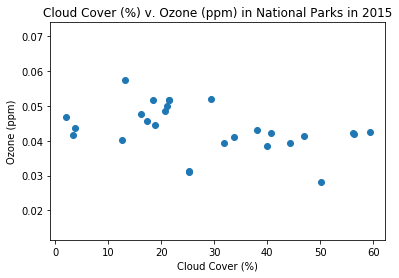

In [18]:
plt.scatter(x = cloud_pollution_merged_2015["2015_Cloud Cover (%)"], y= cloud_pollution_merged_2015["2015_Ozone (ppm)"])
plt.title("Cloud Cover (%) v. Ozone (ppm) in National Parks in 2015")
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Ozone (ppm)")
plt.savefig('Cloud Cover v Ozone in NP 2015.png')

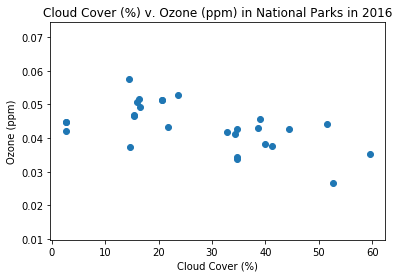

In [19]:
plt.scatter(x = cloud_pollution_merged_2016["2016_Cloud Cover (%)"], y= cloud_pollution_merged_2016["2016_Ozone (ppm)"])
plt.title("Cloud Cover (%) v. Ozone (ppm) in National Parks in 2016")
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Ozone (ppm)")
plt.savefig('Cloud Cover v Ozone in NP 2016.png')

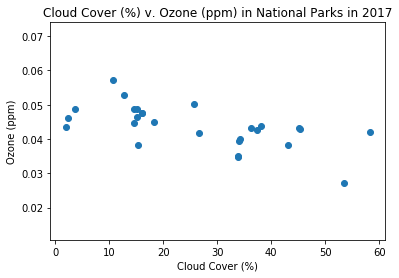

In [20]:
plt.scatter(x = cloud_pollution_merged_2017["2017_Cloud Cover (%)"], y= cloud_pollution_merged_2017["2017_Ozone (ppm)"])
plt.title("Cloud Cover (%) v. Ozone (ppm) in National Parks in 2017")
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Ozone (ppm)")
plt.savefig('Cloud Cover v Ozone in NP 2017.png')

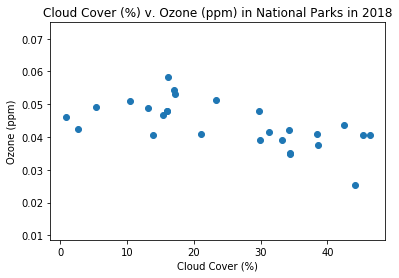

In [21]:
plt.scatter(x = cloud_pollution_merged_2018["2018_Cloud Cover (%)"], y= cloud_pollution_merged_2018["2018_Ozone (ppm)"])
plt.title("Cloud Cover (%) v. Ozone (ppm) in National Parks in 2018")
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Ozone (ppm)")
plt.savefig('Cloud Cover v Ozone in NP 2018.png')

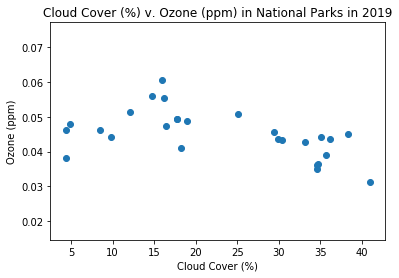

In [22]:
plt.scatter(x = cloud_pollution_merged_2019["2019_Cloud Cover (%)"], y= cloud_pollution_merged_2019["2019_Ozone (ppm)"])
plt.title("Cloud Cover (%) v. Ozone (ppm) in National Parks in 2019")
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Ozone (ppm)")
plt.savefig('Cloud Cover v Ozone in NP 2019.png')